# Determination of Steel Alloy Strength and Dominant metal additives in predicting strength
---
#Overview:
Computing a steel alloy's strength from its compositions of various metal additives is a computationally expensive physical chemistry calculation, often requiring a supercomputer. This project is a data driven approach to predict steel strength based on their composition. A predictive machine learning regression model is fit that can quickly compute steel tensile strength accurately.

#Dataset
Dataset containing 312 steel types and the concentrations of 13 different metals in each: X, and their tensile strengths: Y, in csv format.

1. Preprocessing the dataset using pandas dataframe

2. Regression and prediction of steel tensile strengths using Machine Learning model random forest regressor.

3. Evaluation of model performances, optimization.

4. Determining feature importance: Which metal additives have large effects on strength? 









In [2]:
#Import libraries, import csv data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('drive/My Drive/steel_strength.csv')

print('This is the first few rows of the dataset shown below, there are various metals referred to by their chemical symbol, and the column of interest, Tensile Strength in units of MPa')
df.head()

Mounted at /content/drive/
This is the first few rows of the dataset shown below, there are various metals referred to by their chemical symbol, and the column of interest, Tensile Strength in units of MPa


,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [3]:
# Preprocessing. Remove useless dimensions and split X features and Y ordinate

Y = df.loc[:,'tensile strength'].values
X = df.iloc[:,1:14].values
X = pd.DataFrame(X, columns = ['c','mn','si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti'])
Y = pd.DataFrame(Y, columns = ['Tensile Strength (MPa)'])

print('Here is the processed data X set showing only the concentrations')
X.head()

Here is the processed data X set showing only the concentrations


,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55


In [4]:
print('And here are the corresponding tensile strength values:')
Y.head()

And here are the corresponding tensile strength values:


,Tensile Strength (MPa)
0,2473.5
1,1929.2
2,1871.8
3,2514.9
4,2315.0


In [5]:
# Create train-test split to prevent training data leak in performance evaulation

Y = np.ravel(Y)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

In [6]:
#Create random forest regression model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay 
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators = 100, random_state=3)
model2 = RandomForestRegressor(n_estimators = 100, random_state=3)
RFR = model.fit(X_train, Y_train)

R^2 score: 0.859
Mean Relative Error: 0.05
This is a decently accurate fit


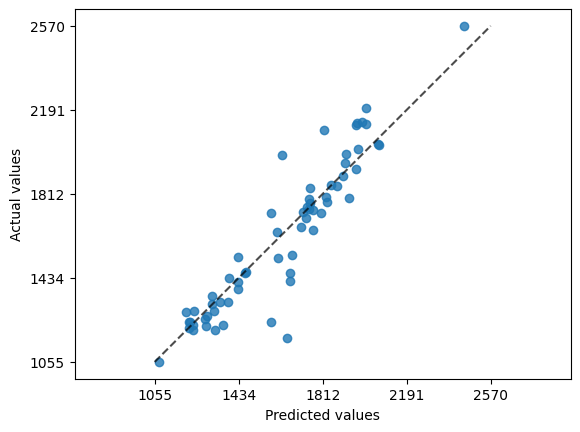

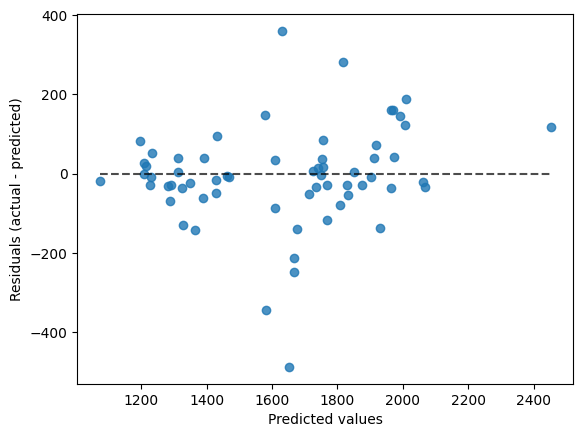

In [7]:
#Evaluate Accuracy of Regression using testing set

predictions = model.predict(X_test)
disp = PredictionErrorDisplay(y_true = Y_test, y_pred = predictions)
disp.plot(kind = 'actual_vs_predicted')
disp.plot()

from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predictions)
print('R^2 score:', f'{r2_score(Y_test, predictions):.3}')
#ax = plt.scatter(Y_test, predictions)
errors = abs((predictions - Y_test)/Y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))
print('This is a decently accurate fit')

Looking at the plots above we can see that the majority of points, ~75% of them, have predicted values of strength less than 100 MPa off from the actual values. This is a good fit apart from a few outliers.

Next, we will see if any if the metal additive feature values are redundant and can be neglected.

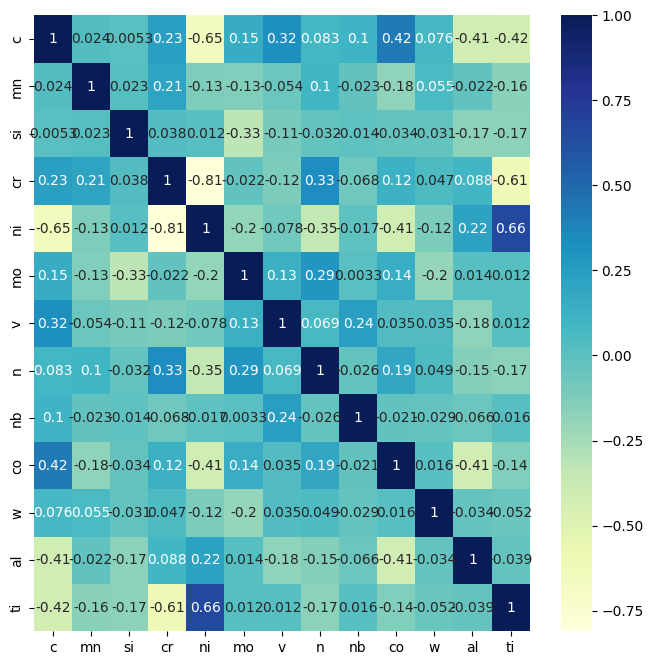

In [8]:
# Check the correlation of the features with covariance matrix

import seaborn as sns
COV = X.copy()

plt.figure(figsize=(8,8))
sns.heatmap(COV.corr(), cmap="YlGnBu", annot=True)
plt.show()

The covariance matrix above shows that only nickel and titanium have highly correlated values: they have a covariance value greater than 0.5. 

Drop Nickel feature and refit model.

In [9]:
X_train_Ni = X_train.drop(['ni'], axis = 1)
X_test_Ni = X_test.drop(['ni'], axis = 1)
X_train_Ni.head()

,c,mn,si,cr,mo,v,n,nb,co,w,al,ti
18,0.01,0.01,0.01,0.01,6.02,0.01,0.0,0.01,14.80,0.0,0.03,0.62
115,0.06,2.09,0.32,16.42,1.51,0.01,0.0,0.01,2.03,0.0,0.88,0.00
116,0.19,0.01,0.01,12.61,1.98,0.01,0.0,0.07,13.79,0.0,0.03,0.00
85,0.35,0.01,0.01,9.00,2.00,0.30,0.0,0.01,18.00,0.0,0.03,0.02
273,0.01,0.01,0.01,0.01,1.44,0.01,0.0,0.01,0.01,0.0,0.08,1.90


In [10]:
RFR = model2.fit(X_train_Ni, Y_train)

In [11]:
predictions = model2.predict(X_test_Ni)

from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predictions)
print('R^2 score:', f'{r2_score(Y_test, predictions):.3}')
#ax = plt.scatter(Y_test, predictions)
errors = abs((predictions - Y_test)/Y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))
print('Accuracy is reduced when excluding Nickel, use original model')

R^2 score: 0.855
Mean Relative Error: 0.05
Accuracy is reduced when excluding Nickel, use original model


Use Individual Conditional Expectation to determine which features have large effect on expectation.
This is not the most realistic method to show effect, because many features have some correlation with others that can change prediction of model, but it is useful to detect general trends.

In [83]:
#Initialize ICE Plot user-defined function
def ice_plot(model, X, feature_idx, feature_values, num_instances=200):
    X_selected = X.iloc[:num_instances].copy()
    ice_data = np.zeros((num_instances, len(feature_values)))
    
    for i, val in enumerate(feature_values):
        X_selected.iloc[:, feature_idx] = val
        ice_data[:, i] = model.predict(X_selected)
        
    return feature_values, ice_data

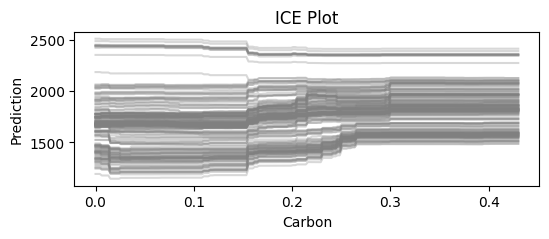

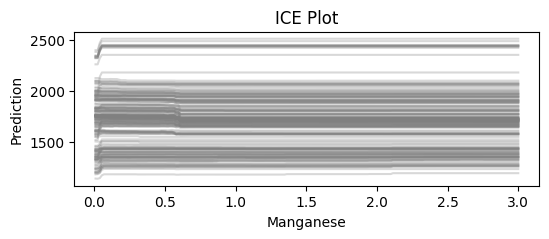

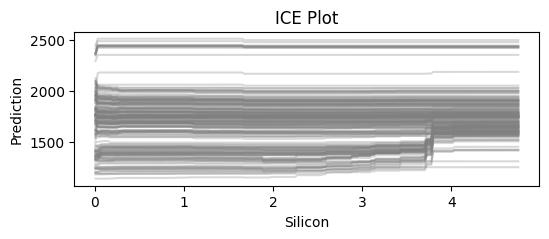

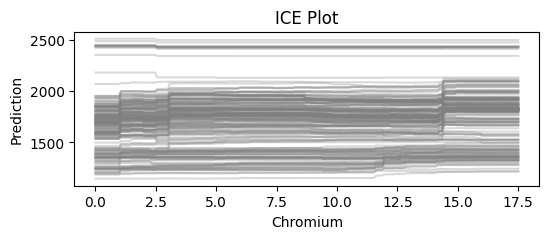

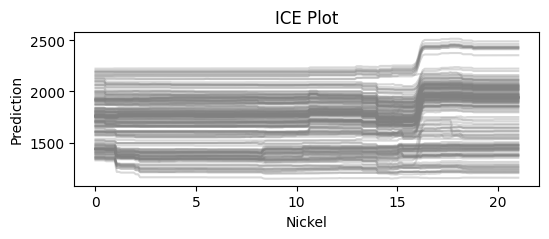

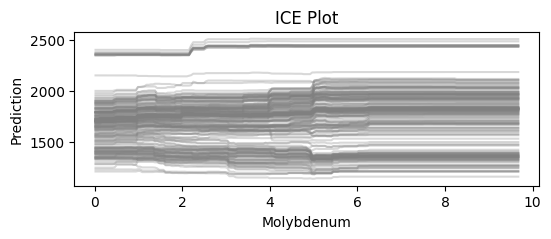

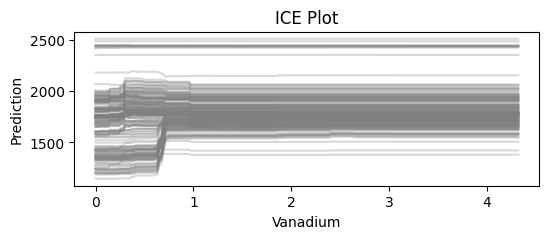

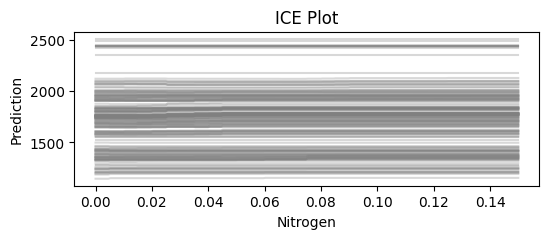

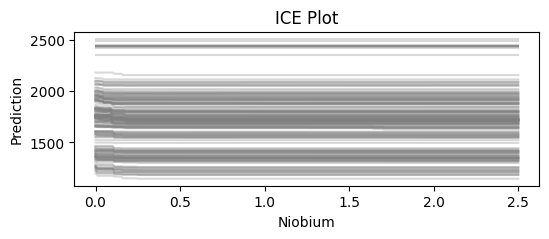

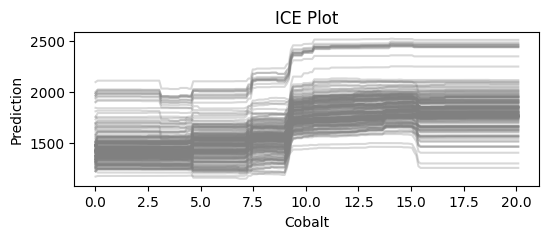

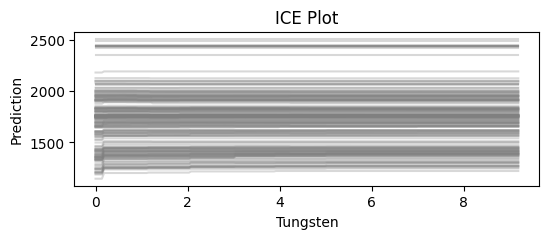

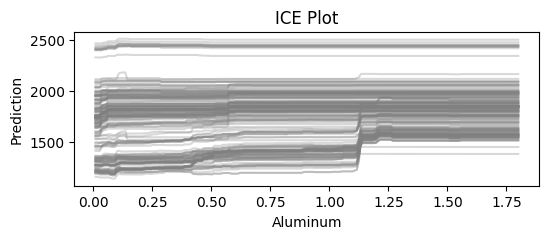

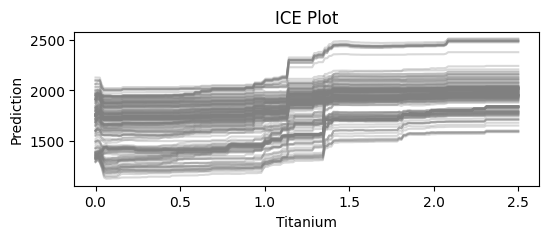

In [84]:
# Print out individual conditional expectation plots  

names = ['Carbon', 'Manganese', 'Silicon', 'Chromium', 'Nickel', 'Molybdenum', 'Vanadium', 'Nitrogen', 'Niobium', 'Cobalt', 'Tungsten', 'Aluminum', 'Titanium']
for feature_idx, x in enumerate(names):
    
    feature_values = np.linspace(min(X.iloc[:, feature_idx]), max(X.iloc[:, feature_idx]), num=200)
    feature_values, ice_data = ice_plot(model, X, feature_idx, feature_values)
    plt.figure(figsize=(6, 2))
    for i in range(ice_data.shape[0]):
        plt.plot(feature_values, ice_data[i, :], c='gray', alpha=0.3)
        
    plt.xlabel(x)
    plt.ylabel('Prediction')
    plt.title('ICE Plot')
    plt.show()

These ICE plots show the effect that changing each metal concentration would have on the model predictions. We can see that there appear optimal ranges for each of the metals. 


*   Titanium is a strong predictor of steel strengh, this is as we would expect.
*   The optimal range for cobalt is between 10-15
*   Higher amounts of Silicon seem to improve only the lowest strengh steels... perhaps there is a better alternative
* Tungsten, Niobium, and Nitrogen have little effect on tensile strength across the board.



In [ ]:
#Shapley
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 31.9 MB/s eta 0:00:00


Permutation explainer: 313it [02:38,  1.85it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


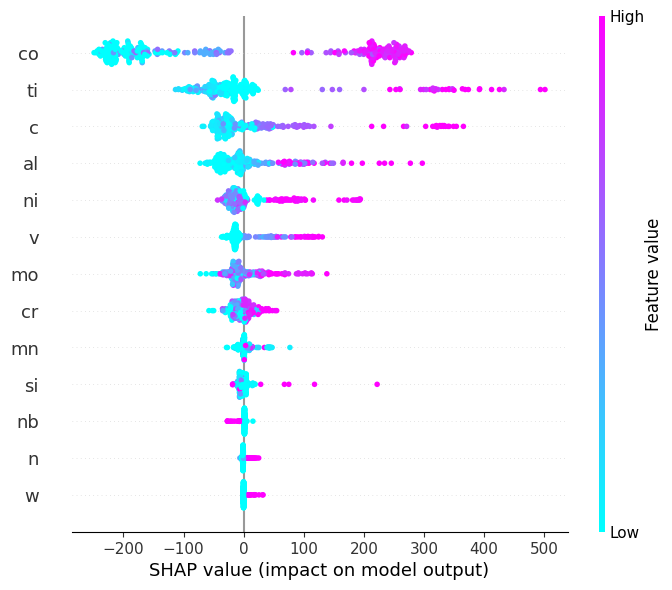

In [ ]:
#Shapley values beeswarm plot. Shows which features have outweighted efect on predicitons according to game theory
import shap

X100 = shap.utils.sample(X, 100)

SHAPP = shap.Explainer(model.predict, X100)
sHap_Nos = SHAPP(X)
shap.plots.beeswarm(sHap_Nos, max_display=14, color=plt.get_cmap("cool"))


The Shapley number plots show that Cobalt, titanium, carbon, and aluminum are the highest contributors to tensile strength, even after taking into account the contributions of all other features or 'voters'.
Also, Tungsten, Niobium, and Nitrogen are confirmed to be the least important features in terms of tensile strength.

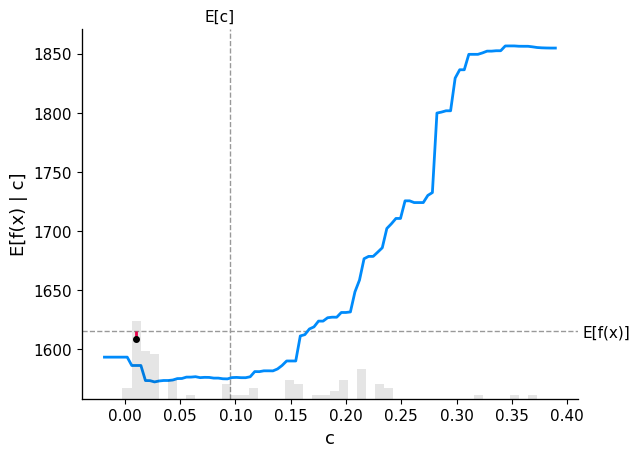

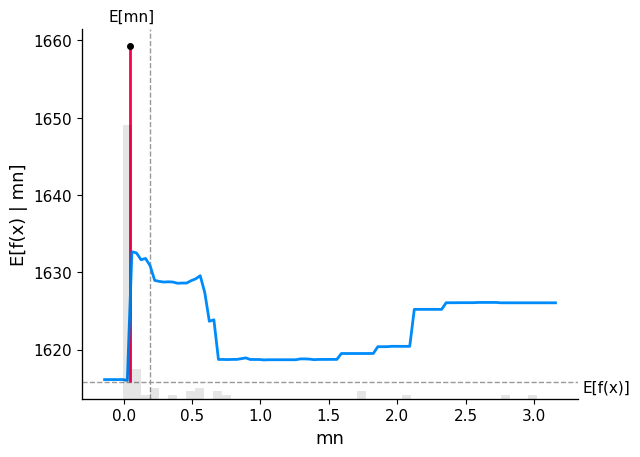

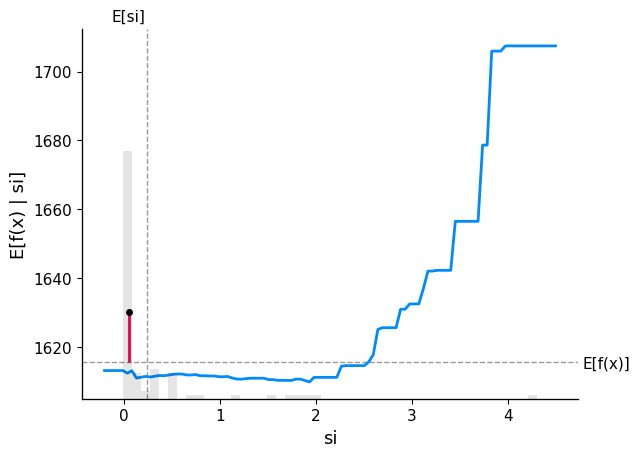

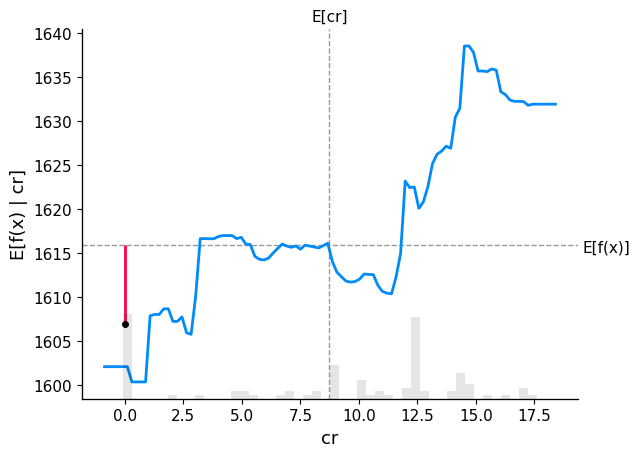

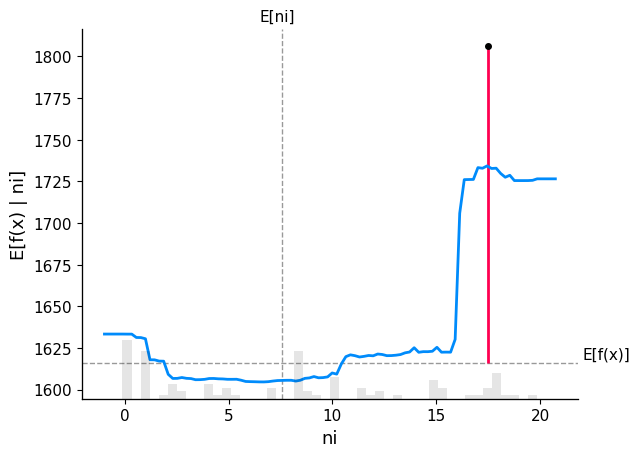

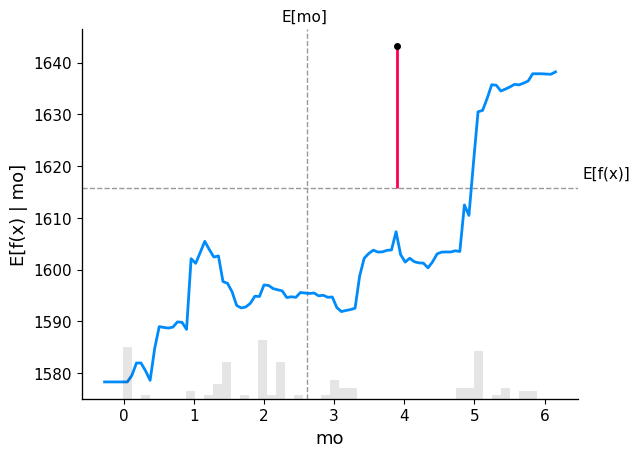

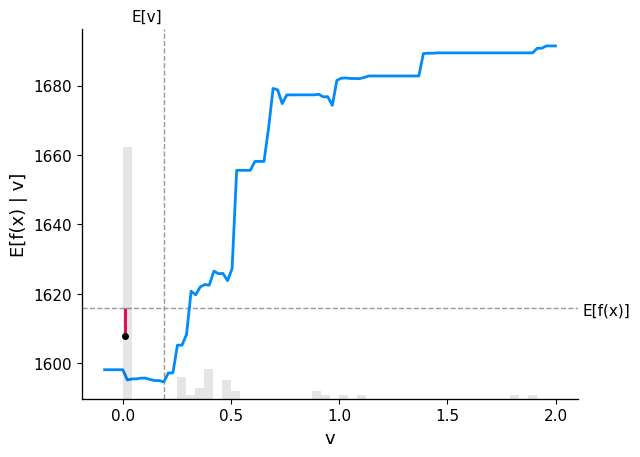

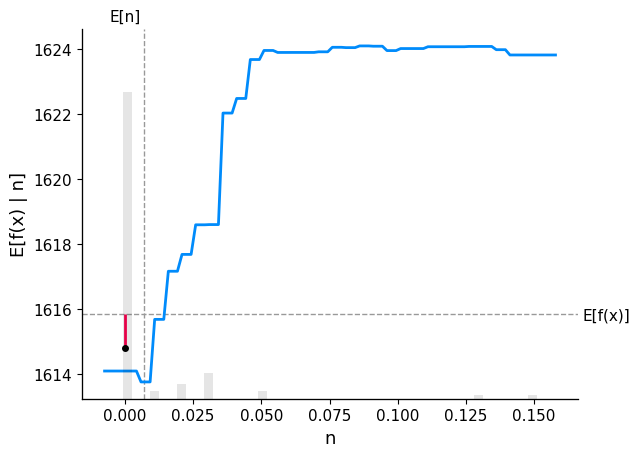

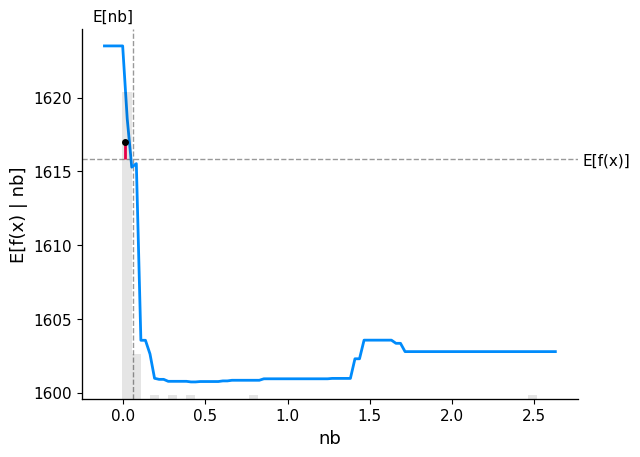

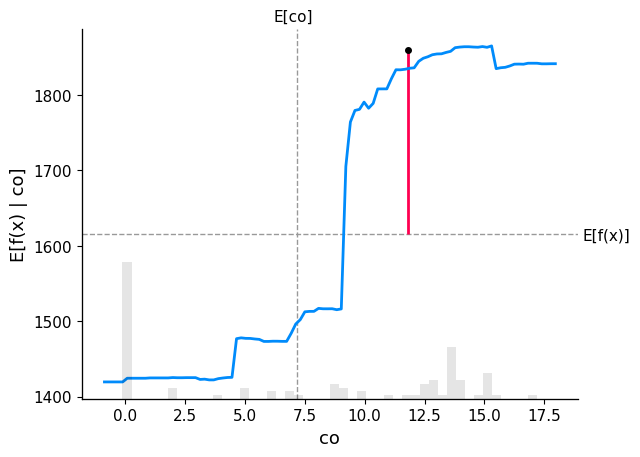

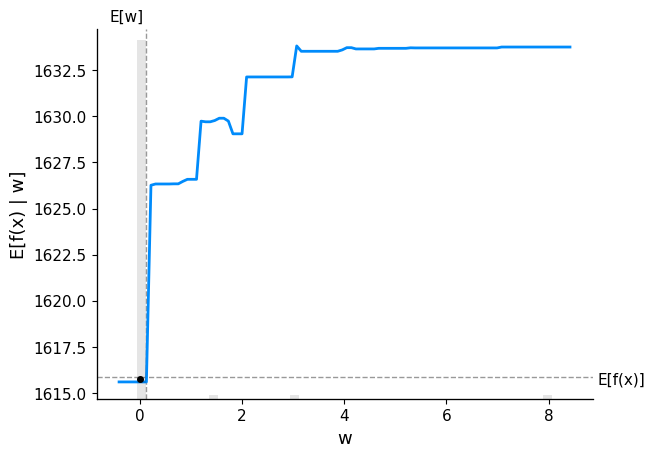

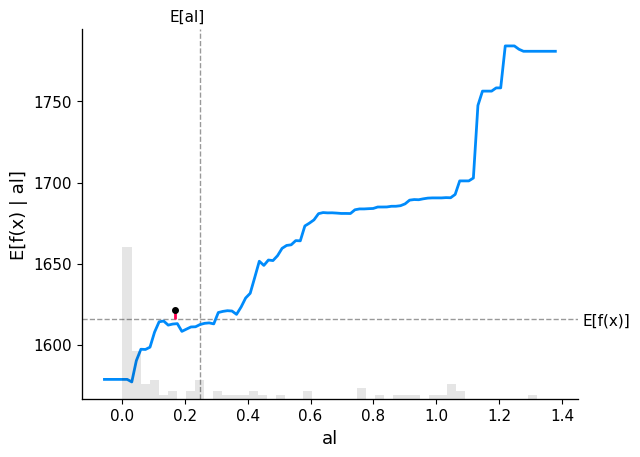

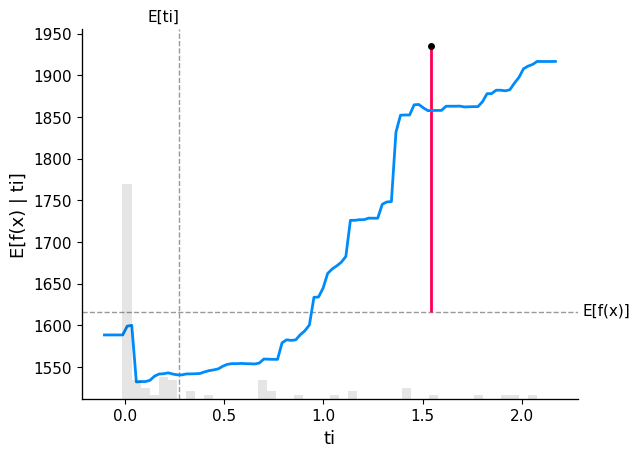

In [ ]:
#Partial Dependence Plots to give approximate relationships between each feature and predicted value of strength.
names2 = ['c', 'mn',	'si',	'cr',	'ni',	'mo',	'v', 'n',	'nb',	'co',	'w',	'al',	'ti']
for L in names2:
    sample_ind = 30
    shap.partial_dependence_plot(
    L, model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=sHap_Nos[sample_ind:sample_ind+1,:])

These Partial Dependence Plots give tensile strength as a function of each feature, after marginalizing out effects of all other features. These are approximate functions and may over or underestimate the effects. Accumulated Local Effects is the best method for this and will be explored further.

# Conclusion

The random forest regression model accurately predicts the tensile strength of the alloys with a mean relative error of 0.05, and an R^2 score of 0.859.
This accurate model is used for determining feature importance. The key takeaways are:

*   Cobalt, Titanium, Carbon, and Aluminum concentrations have the greatest effect on tensile strength of all 13 features.
*   Nitrogen, Niobium, and Tungsten have little to no effect on the strength in the scope of this data set.

More specific optimal ranges of each additive can be deliberated and tested by reviewing the ICE plots and PDP plots further to experiment on stronger steel alloy compositions.